final project
===
due: June 30 2022

authors: pegler, prüwasser, scheftner

## Dataset 2: IQ and creativity

https://pubmed.ncbi.nlm.nih.gov/23825884/  
https://osf.io/hzpgy/

### Description

The relationship between intelligence and creativity: New support for the threshold hypothesis by means of empirical breakpoint detection 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv("data/final_data/fromjauketal2013.csv")

## Data exploration

In [3]:
df.head()

,IQ,CP_avgOriginality,CA
0,124.571647,1.747612,110.0
1,111.313106,1.916540,64.0
2,115.698623,1.837332,52.0
3,111.976033,1.879630,6.0
4,112.078021,1.773148,40.0


### Regression

<AxesSubplot:xlabel='IQ', ylabel='CP_avgOriginality'>

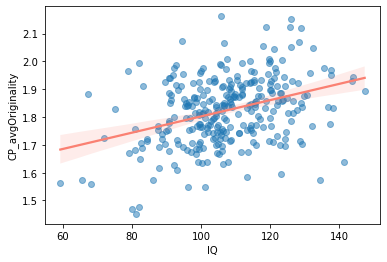

In [20]:
import seaborn as sns

sns.regplot(x="IQ", y="CP_avgOriginality", data=df, line_kws={"color":"salmon"}, scatter_kws={"alpha":0.5})

<AxesSubplot:xlabel='IQ', ylabel='CA'>

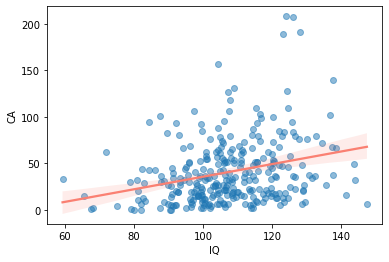

In [19]:
sns.regplot(x="IQ", y="CA", data=df, line_kws={"color":"salmon"}, scatter_kws={"alpha":0.5})

In [113]:
#
#
#

### Bayesian regression

See examples from here https://statsthinking21.github.io/statsthinking21-python/10-BayesianStatistics.html

In [4]:
#
#
#